#Calories need prediction

In [ ]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


# A. Import

In [225]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(42)
# import matplotlib as plt

# import tabulate
# from recsysNN_utils import *
# pd.set_option("display.precision", 1)

In [226]:
# # Check versions of the libraries
# # python --version
# np_version = np.__version__
# pd_version = pd.__version__
# tf_version = tf.__version__
# sns_version = sns.__version__
# plt_version = plt.__version__

# print(f"NumPy version: {np_version}")
# print(f"Pandas version: {pd_version}")
# print(f"TensorFlow version: {tf_version}")
# print(f"Seaborn version: {sns_version}")
# print(f"Matplotlib version: {plt_version}")

In [227]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# B. Load Data


In [228]:
np.random.seed(42)
tf.random.set_seed(42)

In [229]:
df = pd.read_csv("/content/drive/MyDrive/machine_learning/food_grading/dataset/obesity.csv", sep=',')

In [230]:
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [231]:
df.shape

(20758, 18)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [233]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [234]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [235]:
df = df[['Gender', 'Age', 'Height', 'Weight', 'CALC', 'NObeyesdad']]

# Data wrangling

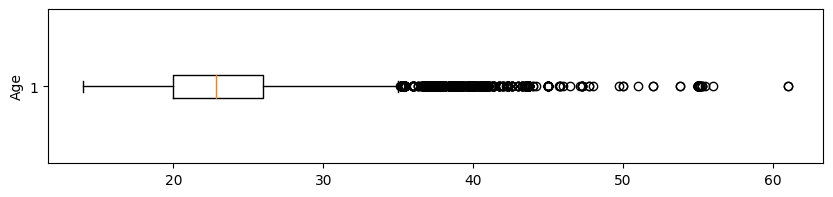

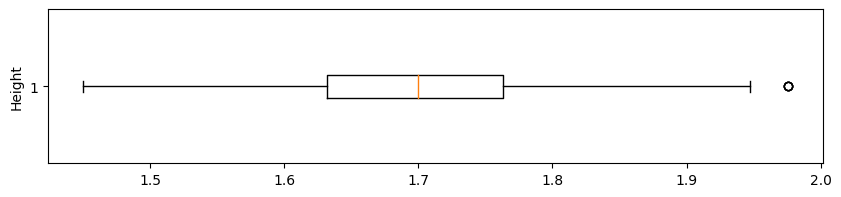

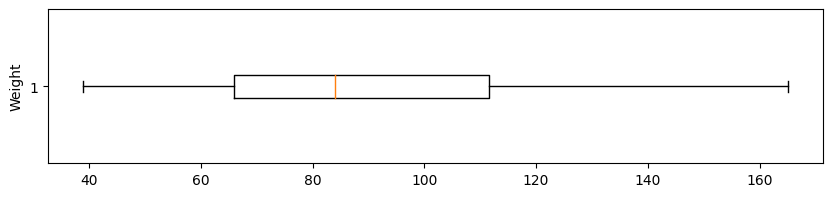

In [236]:
#check outliers
integer_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in integer_features:
    plt.figure(figsize=(10, 2), dpi=100)
    plt.boxplot(df[feature], vert=False)
    plt.ylabel(feature)
    plt.show()

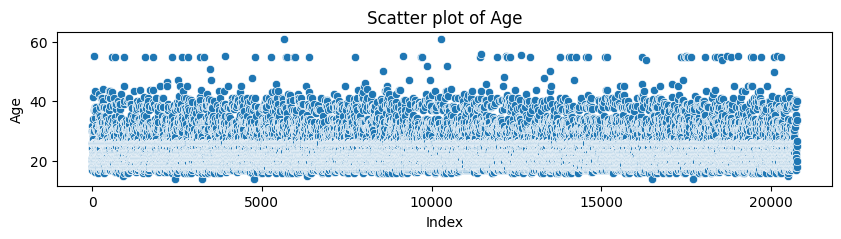

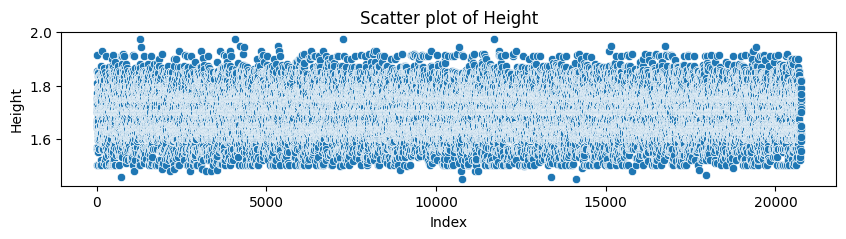

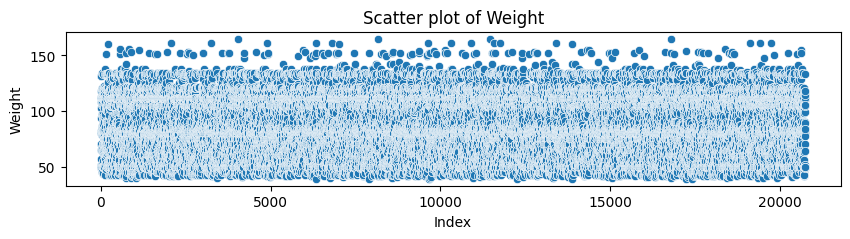

In [237]:
#check outliers
in_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in in_features:
    plt.figure(figsize=(10, 2), dpi=100)
    sns.scatterplot(x=df.index, y=df[feature])
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.title(f'Scatter plot of {feature}')
    plt.show()

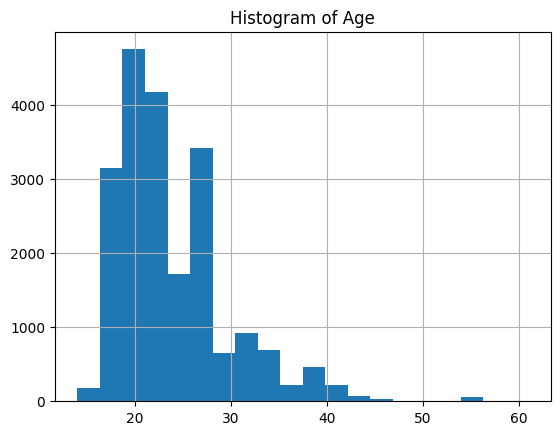

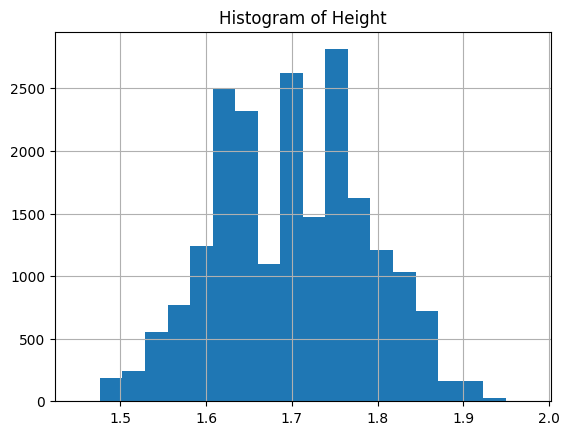

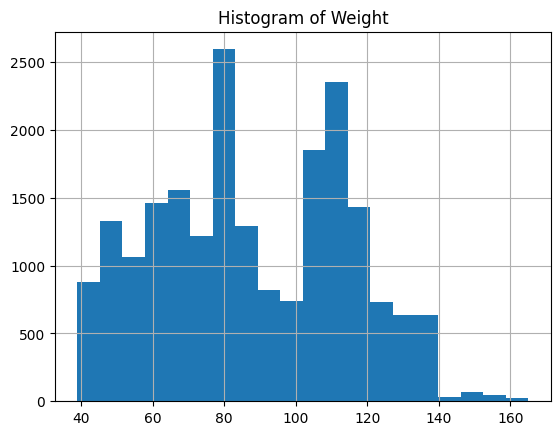

In [238]:
#check outliers
in_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in in_features:
    df[feature].hist(bins=20)
    plt.title(f'Histogram of {feature}')

    plt.show()


In [239]:
label_encoder = LabelEncoder()
df['CALC'] = label_encoder.fit_transform(df['CALC'])
df.head()

<ipython-input-239-e27cc728de8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CALC'] = label_encoder.fit_transform(df['CALC'])


,Gender,Age,Height,Weight,CALC,NObeyesdad
0,Male,24.443011,1.699998,81.669950,1,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,2,Normal_Weight
2,Female,18.000000,1.711460,50.165754,2,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,1,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,1,Overweight_Level_II


In [240]:
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])
df.head()

<ipython-input-240-5c8c77f16d90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])


,Gender,Age,Height,Weight,CALC,NObeyesdad
0,Male,24.443011,1.699998,81.669950,1,6
1,Female,18.000000,1.560000,57.000000,2,1
2,Female,18.000000,1.711460,50.165754,2,0
3,Female,20.952737,1.710730,131.274851,1,4
4,Male,31.641081,1.914186,93.798055,1,6


In [241]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head(10)

<ipython-input-241-804a728b0546>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder.fit_transform(df['Gender'])


,Gender,Age,Height,Weight,CALC,NObeyesdad
0,1,24.443011,1.699998,81.669950,1,6
1,0,18.000000,1.560000,57.000000,2,1
2,0,18.000000,1.711460,50.165754,2,0
3,0,20.952737,1.710730,131.274851,1,4
4,1,31.641081,1.914186,93.798055,1,6
5,1,18.128249,1.748524,51.552595,1,0
6,1,29.883021,1.754711,112.725005,1,3
7,1,29.891473,1.750150,118.206565,1,3
8,1,17.000000,1.700000,70.000000,2,5
9,0,26.000000,1.638836,111.275646,1,4


In [242]:
columns = ['Age']
outlier_percentage = {}

for column in columns:
    column_data = df[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower) | (column_data > upper)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

    # Remove outliers from the DataFrame
    df = df[(df[column] >= lower) & (df[column] <= upper)]

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}':{percentage:.2f}%")
    print()
    print(f"Lower : {lower}")
    print(f"Upper : {upper}")
    print()
    print(f"Data Outlier': {np.array(outliers)}")

Count of outliers in column 'Age': 1074
Percentage of outliers in column 'Age':5.17%

Lower : 11.0
Upper : 35.0

Data Outlier': [41.318302 37.       55.272573 ... 35.389491 40.501722 40.      ]


In [243]:
df

,Gender,Age,Height,Weight,CALC,NObeyesdad
0,1,24.443011,1.699998,81.669950,1,6
1,0,18.000000,1.560000,57.000000,2,1
2,0,18.000000,1.711460,50.165754,2,0
3,0,20.952737,1.710730,131.274851,1,4
4,1,31.641081,1.914186,93.798055,1,6
...,...,...,...,...,...,...
20753,1,25.137087,1.766626,114.187096,1,3
20754,1,18.000000,1.710000,50.000000,1,0
20755,1,20.101026,1.819557,105.580491,2,3
20756,1,33.852953,1.700000,83.520113,2,6


# EDA

<Axes: xlabel='Gender', ylabel='count'>

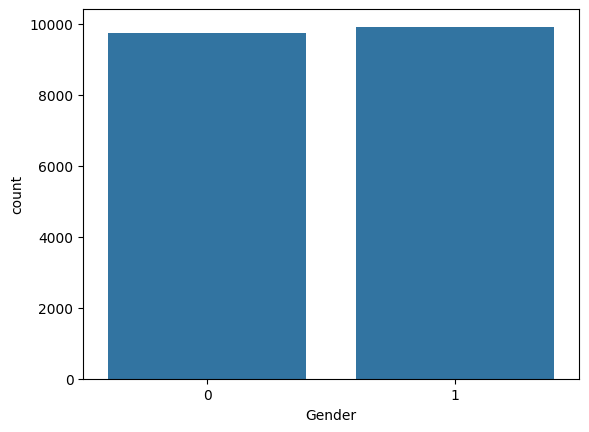

In [ ]:
sns.countplot(x=df["Gender"])

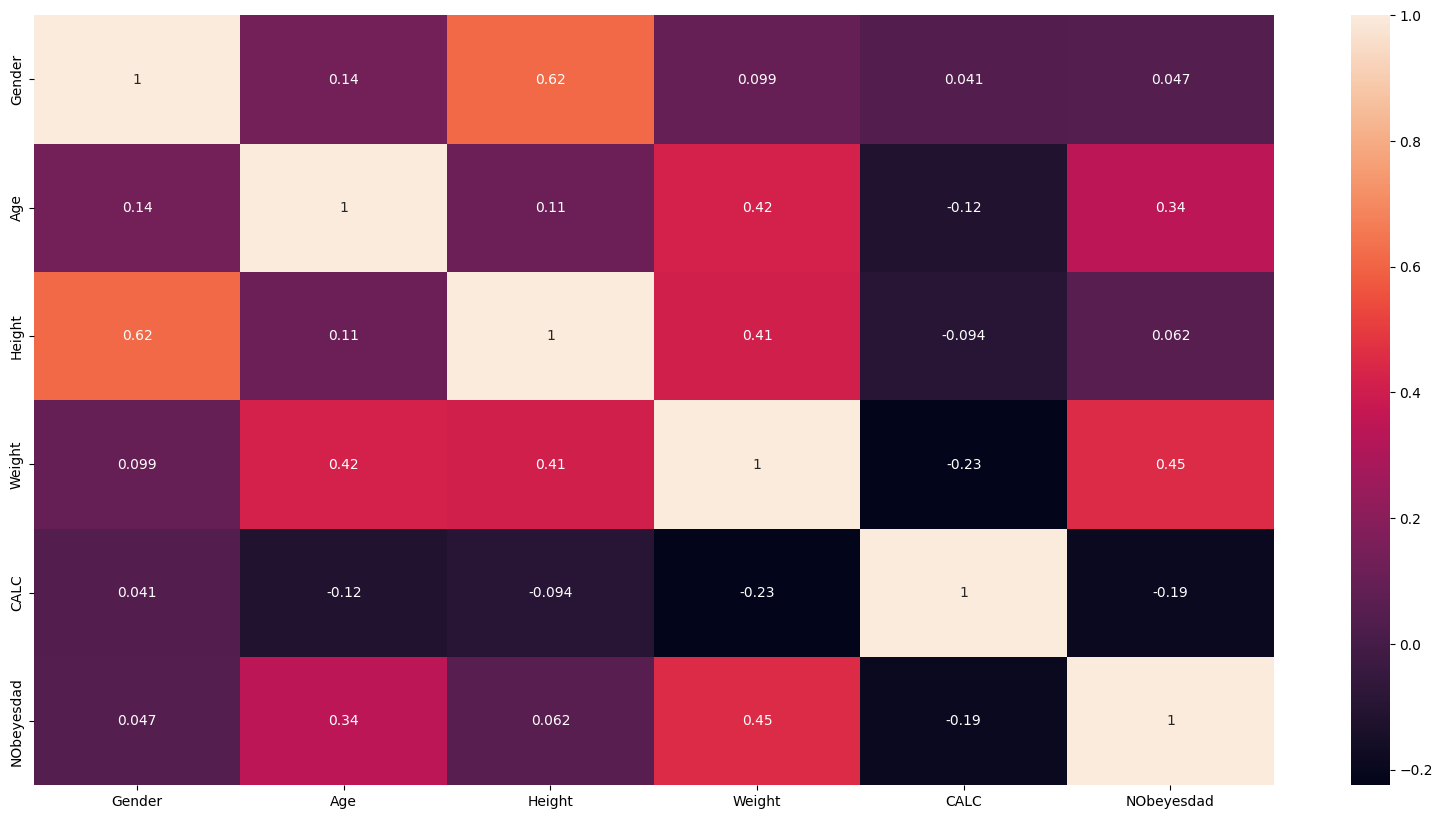

In [ ]:
matrix = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(matrix, annot=True)
plt.show()

<ipython-input-22-31d8cfbc27cb>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-22-31d8cfbc27cb>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-22-31d8cfbc27cb>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in s

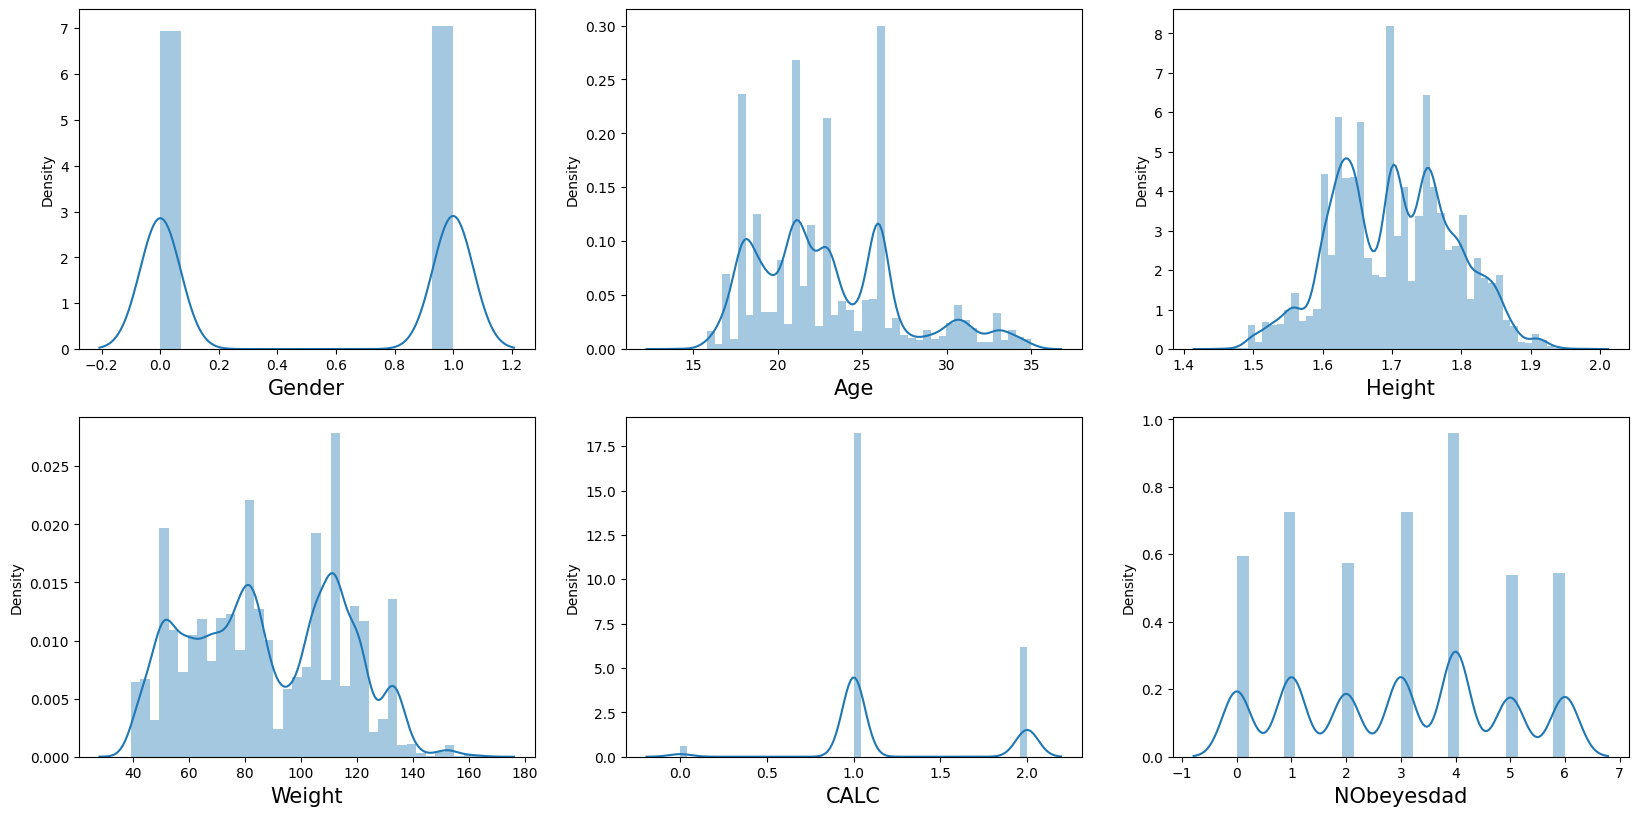

In [ ]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in df:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1
plt.show()


# Model Tensorflow

In [244]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [245]:
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]

In [185]:
df

,Gender,Age,Height,Weight,CALC,NObeyesdad
0,1,24.443011,1.699998,81.669950,1,6
1,0,18.000000,1.560000,57.000000,2,1
2,0,18.000000,1.711460,50.165754,2,0
3,0,20.952737,1.710730,131.274851,1,4
4,1,31.641081,1.914186,93.798055,1,6
...,...,...,...,...,...,...
20753,1,25.137087,1.766626,114.187096,1,3
20754,1,18.000000,1.710000,50.000000,1,0
20755,1,20.101026,1.819557,105.580491,2,3
20756,1,33.852953,1.700000,83.520113,2,6


In [246]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [247]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [272]:
import joblib

# Save the scaler object to a file
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [274]:
# from sklearn.preprocessing import StandardScaler
# import numpy as np
print(scaler.mean_)
print(scaler.scale_)

[ 0.50473106 22.98704748  1.70345584 88.16449175  1.22213755]
[ 0.49997762  4.20633209  0.08576373 26.82528361  0.47057055]


In [249]:
num_classes = len(np.unique(y))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [250]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [251]:
model.compile(optimizer=tf.keras.optimizers.Nadam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [252]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
)

In [142]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# checkpoint_path = "model_checkpoint.h5"
# model_checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     save_weights_only=False,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)


In [253]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/50
394/394 [==============================] - 4s 4ms/step - loss: 0.9375 - accuracy: 0.6742 - val_loss: 0.4977 - val_accuracy: 0.8305
Epoch 2/50
394/394 [==============================] - 1s 4ms/step - loss: 0.4475 - accuracy: 0.8422 - val_loss: 0.4175 - val_accuracy: 0.8603
Epoch 3/50
394/394 [==============================] - 2s 6ms/step - loss: 0.4124 - accuracy: 0.8562 - val_loss: 0.4101 - val_accuracy: 0.8552
Epoch 4/50
394/394 [==============================] - 2s 6ms/step - loss: 0.4012 - accuracy: 0.8572 - val_loss: 0.3941 - val_accuracy: 0.8670
Epoch 5/50
394/394 [==============================] - 1s 4ms/step - loss: 0.3940 - accuracy: 0.8577 - val_loss: 0.3827 - val_accuracy: 0.8683
Epoch 6/50
394/394 [==============================] - 1s 3ms/step - loss: 0.3891 - accuracy: 0.8615 - val_loss: 0.3820 - val_accuracy: 0.8613
Epoch 7/50
394/394 [==============================] - 1s 3ms/step - loss: 0.3866 - accuracy: 0.8644 - val_loss: 0.3856 - val_accuracy: 0.8638
Epoch 

In [255]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test accuracy: {test_accuracy}')

124/124 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8661
Test accuracy: 0.8661417365074158


In [256]:
model.summary()
for layer in model.layers:
    print(layer.get_weights())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               768       
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 7)                 231       
                                                                 
Total params: 11335 (44.28 KB)
Trainable params: 11335 (44.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
[array([[ 3.47777277e-01,  1.76978767e-01,  1.76053628e-01,
         1.32302955e-01, -4.22958553e-01,  2.88385659e-01,
         2.90901959e-01, -2.224

In [257]:
y_test_pred = model.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test_true_classes, y_test_pred_classes))
print("Classification Report:")
print(classification_report(y_test_true_classes, y_test_pred_classes))

124/124 [==============================] - 0s 2ms/step
Confusion Matrix:
[[483  35   0   1   0   1   1]
 [ 57 496   2   0   0  59   7]
 [  1   1 425  24   7   2  36]
 [  0   0  22 551   1   0   6]
 [  1   0   2   0 784   1   0]
 [  4  45   8   0   0 310  85]
 [  0   9  57   2   0  50 361]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       521
           1       0.85      0.80      0.82       621
           2       0.82      0.86      0.84       496
           3       0.95      0.95      0.95       580
           4       0.99      0.99      0.99       788
           5       0.73      0.69      0.71       452
           6       0.73      0.75      0.74       479

    accuracy                           0.87      3937
   macro avg       0.85      0.85      0.85      3937
weighted avg       0.87      0.87      0.87      3937



124/124 [==============================] - 1s 5ms/step - loss: 0.3882 - accuracy: 0.8661
Test loss: 0.38815200328826904
Test accuracy: 0.8661417365074158


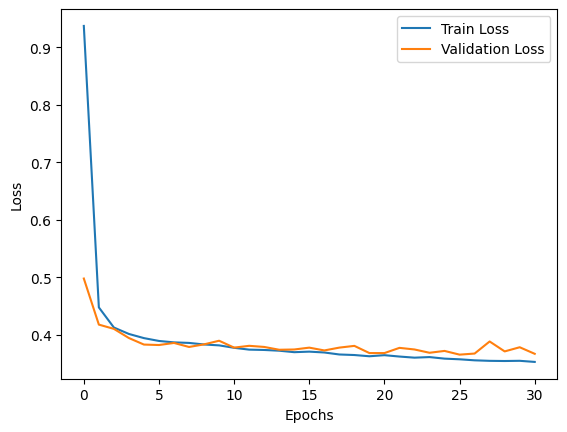

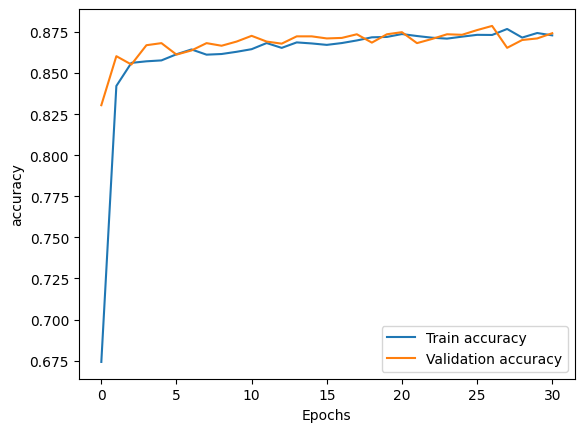

In [259]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [260]:
def calculate_bmr(gender, age, body_height, body_weight, activity):
    body_height = body_height*100
    if gender == 0:  # Perempuan
        bmr = 447.593 + (9.247 * body_weight) + (3.098 * body_height) - (4.330 * age)
    else:  # Laki-laki
        bmr = 88.362 + (13.397 * body_weight) + (4.799 * body_height) - (5.677 * age)

    if activity == 1:  # Perempuan
        tdee = bmr * 1.465
    elif activity == 2:  # Laki-laki
        tdee = bmr * 1.2
    else:
        tdee = bmr * 1.8125

    return tdee

In [261]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.title('Training Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

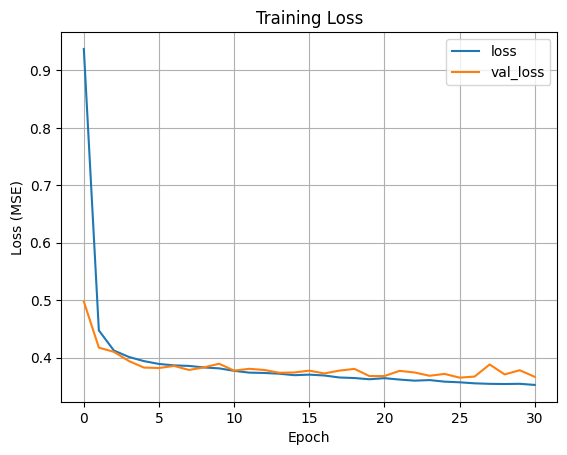

In [262]:
plot_loss(history)


In [268]:
import json
obesity_mapping = {
    0: "Insufficient_Weight",
    1: "Normal_Weight",
    2: "Obesity_Type_I",
    3: "Obesity_Type_II",
    4: "Obesity_Type_III",
    5: "Overweight_Level_I",
    6: "Overweight_Level_II"
}

def predict_all(model , scaler, gender, age, body_height, body_weight, calc):
    user_data = np.array([[gender, age, body_height, body_weight, calc]])
    user_data = scaler.transform(user_data)  # Apply the same scaling
    predicted_obesity = model.predict(user_data)
    predicted_obesity = np.argmax(predicted_obesity, axis=1)[0]
    predicted_calories  = calculate_bmr(gender, age, body_height, body_weight, activity)

    return {
        "predicted_calories": int(predicted_calories),
        "predicted_obesity": int(predicted_obesity),
        "obesity_label": obesity_mapping[int(predicted_obesity)],
        "user_data" : user_data.tolist()

    }


# Example usage
age = 18
body_weight = 57
body_height = 1.56 #input (m)
gender = 0 #input (0 for female, 1 for male)
activity = 2
prediction = predict_all(model, scaler, gender, age, body_height, body_weight, activity)
print(json.dumps(prediction, indent=4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
{
    "predicted_calories": 1656,
    "predicted_obesity": 1,
    "obesity_label": "Normal_Weight",
    "user_data": [
        [
            -1.0095073122386309,
            -1.1856047894444361,
            -1.6726865917904488,
            -1.1617581459964776,
            1.6530198192551975
        ]
    ]
}


In [265]:

model.save('model_new.h5')


## Flask

In [152]:
model.save('predict_all.h5')

In [153]:
from flask import Flask, jsonify, request
import numpy as np
# from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import joblib

# Initialize Flask app
# app = Flask(__name__)

# Load the model
model.load_weights("/content/model_checkpoint.h5")
# Load the scaler
# Assuming the scaler is saved as 'scaler.pkl' using joblib
# scaler = joblib.load('/content/scaler.pkl')

# Function to calculate BMR (Basal Metabolic Rate)
def calculate_bmr(gender, age, body_height, body_weight, activity):
    body_height_cm = body_height * 100
    if gender == 0:  # Female
        bmr = 447.593 + (9.247 * body_weight) + (3.098 * body_height_cm) - (4.330 * age)
    else:  # Male
        bmr = 88.362 + (13.397 * body_weight) + (4.799 * body_height_cm) - (5.677 * age)

    if activity == 1:
        tdee = bmr * 1.465
    elif activity == 2:
        tdee = bmr * 1.2
    else:
        tdee = bmr * 1.8125

    return tdee

# Obesity level mapping
obesity_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Obesity_Type_I',
    3: 'Obesity_Type_II',
    4: 'Obesity_Type_III',
    5: 'Overweight_Level_I',
    6: 'Overweight_Level_II'
}

# @app.route('/classify', methods=['POST'])
def classify():
    # try:
    # content = request.json
    age = 19
    body_weight = 100
    body_height = 1.6 #input (m)
    gender = 1
    activity_level = 1

    calories = calculate_bmr(gender, age, body_height, body_weight, activity_level)

    # Prepare the input data for the model
    user_data = np.array([[gender, age, body_height, body_weight, activity_level]])
    user_data = scaler.transform(user_data)

    predictions =  model.predict(user_data)
    predicted_weight_status_index = np.argmax(predictions)
    predicted_weight_status = int(predicted_weight_status_index)

    result = {
        "predicted_calories": int(calories),
        "predicted_obesity": int(predicted_weight_status),
        "obesity_label": obesity_mapping[int(predicted_weight_status)],
        "user_data": user_data
    }

    return result

    # except Exception as e:
    #     return jsonify({'message': 'Error processing the request', 'details': str(e)}), 400

if __name__ == '__main__':
    # app.run(debug=True)
    print(classify())


1/1 [==============================] - 0s 21ms/step
{'predicted_calories': 3058, 'predicted_obesity': 2, 'obesity_label': 'Obesity_Type_I', 'user_data': array([[ 0.99058223, -0.94786797, -1.20628897,  0.4412072 , -0.47206003]])}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Model Gradient GradientBoostingClassifier

In [ ]:
# X = df.drop("NObeyesdad", axis=1)
# y = df["NObeyesdad"]

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier

# from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.metrics import f1_score, confusion_matrix, classification_report
# from sklearn.model_selection import train_test_split

# # g = GaussianNB()
# # b = BernoulliNB()
# # l = LogisticRegression()
# # d = DecisionTreeClassifier()
# # r = RandomForestClassifier()
# gb= GradientBoostingClassifier()
# # kn= KNeighborsClassifier()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# gb = GradientBoostingClassifier()
# gb.fit(X_train, y_train)

# y_test_pred = gb.predict(X_test)

# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_test_pred))
# print("Classification Report:")
# print(classification_report(y_test, y_test_pred))


In [ ]:
# def pred_obesity(model, scaler, gender, age, body_weight, body_height, calc):
#     user_data = np.array([[gender, age, body_weight, body_height, calc]])
#     user_data = scaler.transform(user_data)  # Apply the same scaling
#     prediction = model.predict(user_data)
#     return prediction[0]

In [ ]:
# age = 21
# body_weight = 10
# body_height = 1.1
# gender = 1
# activity = 1

# predict_obesity = pred_obesity(gb, scaler, gender, age, body_weight, body_height, activity)
# print(f'Prediksi Obesity: {predict_obesity}')


# Split test, val, train


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "cp.h5"
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

def build_model(learning_rate, dropout_rate):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        BatchNormalization(),  # Batch normalization layer
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        BatchNormalization(),  # Batch normalization layer
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        BatchNormalization(),  # Batch normalization layer
        Dense(16, activation='relu'),
        Dropout(dropout_rate),
        Dense(7, activation='softmax')  # 7 units for 7 classes
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
                  metrics=['accuracy'])



    # Build and train the model
    # model = build_model(learning_rate, dropout_rate)
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[model_checkpoint_callback])
    return model

In [ ]:
 # Define hyperparameters
learning_rate = 0.001
dropout_rate = 0.5
model = build_model(learning_rate,dropout_rate)


Epoch 1/100
370/370 [==============================] - 5s 6ms/step - loss: 1.9618 - accuracy: 0.2531 - val_loss: 1.3348 - val_accuracy: 0.5504
Epoch 2/100
370/370 [==============================] - 2s 6ms/step - loss: 1.4598 - accuracy: 0.4130 - val_loss: 0.9673 - val_accuracy: 0.5585
Epoch 3/100
370/370 [==============================] - 2s 7ms/step - loss: 1.2347 - accuracy: 0.4922 - val_loss: 0.8475 - val_accuracy: 0.7437
Epoch 4/100
370/370 [==============================] - 3s 8ms/step - loss: 1.1256 - accuracy: 0.5315 - val_loss: 0.7753 - val_accuracy: 0.6873
Epoch 5/100
370/370 [==============================] - 2s 6ms/step - loss: 1.0554 - accuracy: 0.5564 - val_loss: 0.7186 - val_accuracy: 0.7681
Epoch 6/100
370/370 [==============================] - 2s 5ms/step - loss: 1.0137 - accuracy: 0.5725 - val_loss: 0.7054 - val_accuracy: 0.7922
Epoch 7/100
370/370 [==============================] - 2s 5ms/step - loss: 0.9730 - accuracy: 0.5780 - val_loss: 0.6872 - val_accuracy: 0.8080

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

124/124 [==============================] - 0s 2ms/step - loss: 0.5134 - accuracy: 0.8570
Test Accuracy: 85.70%


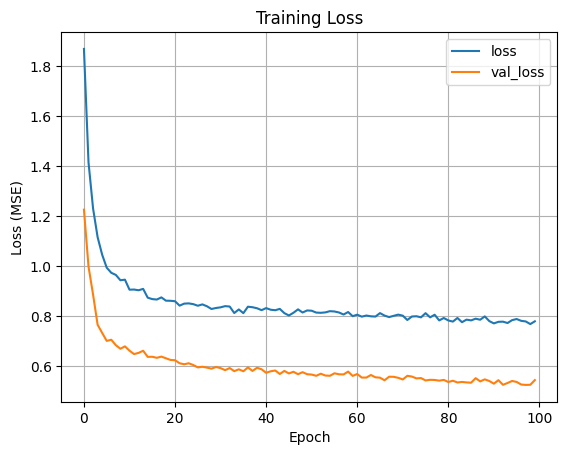

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.title('Training Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history)
print(history)

In [ ]:
import json
obesity_mapping = {
    0: "Insufficient_Weight",
    1: "Normal_Weight",
    2: "Obesity_Type_I",
    3: "Obesity_Type_II",
    4: "Obesity_Type_III",
    5: "Overweight_Level_I",
    6: "Overweight_Level_II"
}

def predict_all(model, scaler, gender, age, body_height, body_weight, calc):
    user_data = np.array([[gender, age, body_height, body_weight, calc]])
    user_data = scaler.transform(user_data)  # Apply the same scaling
    predicted_obesity = model.predict(user_data)
    predicted_obesity = np.argmax(predicted_obesity, axis=1)[0]
    predicted_calories  = calculate_bmr(gender, age, body_height, body_weight, activity)

    return {
        "predicted_calories": int(predicted_calories),
        "predicted_obesity": int(predicted_obesity),
        "obesity_label": obesity_mapping[int(predicted_obesity)]
    }


# Example usage
age = 25
body_weight = 200
body_height = 1.75 #input (m)
gender = 0
activity = 2

prediction = predict_all(model, scaler, gender, age, body_height, body_weight, activity)
print(json.dumps(prediction, indent=4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
{
    "predicted_calories": 3277,
    "predicted_obesity": 4,
    "obesity_label": "Obesity_Type_III"
}


In [ ]:
model.summary()
model.save('modeljadikah.h5')  # Save as HDF5 file

Model: "sequential_179"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_887 (Dense)           (None, 128)               768       
                                                                 
 dropout_706 (Dropout)       (None, 128)               0         
                                                                 
 batch_normalization_516 (B  (None, 128)               512       
 atchNormalization)                                              
                                                                 
 dense_888 (Dense)           (None, 64)                8256      
                                                                 
 dropout_707 (Dropout)       (None, 64)                0         
                                                                 
 batch_normalization_517 (B  (None, 64)                256       
 atchNormalization)                                 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# # Load the latest checkpoint
# checkpoint_dir = "/content/training_checkpoints"
# latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
# model.load_weights(latest_checkpoint)

# # Evaluate the model on the test set
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {accuracy * 100:.2f}%")
# print(f"latest_checkpoint: {latest_checkpoint}%")

# # Make predictions on the test set
# predictions = model.predict(X_test)
# predicted_classes = np.argmax(predictions, axis=1)

# # Compare predictions with actual values
# comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_classes})
# print(comparison)


124/124 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.8636
Test Accuracy: 86.36%
latest_checkpoint: /content/training_checkpoints/cp-0063.ckpt%
124/124 [==============================] - 0s 1ms/step
       Actual  Predicted
1255        0          0
3702        3          3
1911        1          1
13809       4          4
10857       4          4
...       ...        ...
20183       0          0
12317       4          4
15157       4          4
7674        4          4
19123       3          3

[3937 rows x 2 columns]


In [ ]:
loaded_model = tf.keras.models.load_model('my_model.h5')

In [ ]:
loaded_loss, loaded_accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Loaded Model Test Accuracy: {loaded_accuracy * 100:.2f}%")

124/124 [==============================] - 1s 3ms/step - loss: 0.5154 - accuracy: 0.8654
Loaded Model Test Accuracy: 86.54%
